In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Part 1

In [4]:
input_data1 = df[['Mileage']]
output_data1 = df['Price']

In [5]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data1, output_data1)

print(regr1.coef_, regr1.intercept_)

[-0.1725205] 24764.5590061


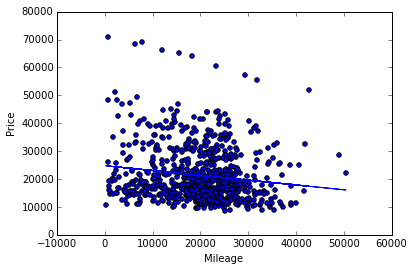

In [6]:
plt.scatter(input_data1, output_data1)
plt.plot(input_data1, regr1.predict(input_data1))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [7]:
print(regr1.score(input_data1, output_data1))

0.0204634473235


The comparison between mileage and price returned an $R^2$ score of .02. This is below the .8 threshold and therefore this comparision does not show a strong correlation.

## Part 2

In [8]:
input_data2 = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]

output_data2 = df['Price']

In [9]:
regr2 = linear_model.LinearRegression()
regr2.fit(input_data2, output_data2)
print(regr2.coef_, regr2.intercept_)

[ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03] 6758.7551436


In [10]:
print(regr2.score(input_data2, output_data2))

0.446264353673


The comparison between price and mileage, cylinder, liters, doors, cruise, sound and leather returned an $R^2$ score of .45. This is below the .8 threshold and therefore this comparison does not show a strong correlation.

In [11]:
combos = [list(itertools.combinations(input_data2.columns,x)) for x in range(1,7)]

In [12]:
all_combos = []
for x in combos:
    for combo in x:
        all_combos.append(list(combo))

In [13]:
count = 0
r_score = [0]
while count < len(all_combos):
    regr2.fit(df[all_combos[count]],output_data2)
    if regr2.score(df[all_combos[count]],output_data2) > 0:
        r_score.append(regr2.score(df[all_combos[count]],output_data2))
    count += 1

In [14]:
max(r_score)

0.44569092105870245

After running all other options, the highest $R^2$ score was found when comparing price to mileage, cylinder, liters, doors, cruise, sound and leather. The $R^2$ was 0.44626, well below the 0.8 threshold needed to show a strong correlation.

## Part 3

In [15]:
make = df['Make'].unique()

In [16]:
model = df['Model'].unique()

In [17]:
b_type = df['Type'].unique()

In [18]:
df3 = df.copy()

In [19]:
for x in make:
    df3[x] = [int(_ == x) for _ in df3['Make']]

In [20]:
for x in model:
    df3[x] = [int(_ == x) for _ in df3['Model']]

In [21]:
for x in b_type:
    df3[x] = [int(_ == x) for _ in df3['Type']]

In [22]:
df3.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,...,9_5,9_5 HO,9-2X AWD,Ion,L Series,Sedan,Convertible,Hatchback,Coupe,Wagon
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
del df3['Make']
del df3['Model']
del df3['Trim']
del df3['Type']

In [24]:
df3.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,...,9_5,9_5 HO,9-2X AWD,Ion,L Series,Sedan,Convertible,Hatchback,Coupe,Wagon
0,17314.103129,8221,6,3.1,4,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,17542.036083,9135,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16218.847862,13196,6,3.1,4,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,16336.913140,16342,6,3.1,4,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,16339.170324,19832,6,3.1,4,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
columns = df3.columns[1:]

In [26]:
columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather',
       'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn',
       'Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier', 'Classic',
       'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo', 'Bonneville',
       'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire', 'Vibe', '9_3',
       '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion', 'L Series', 'Sedan',
       'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype='object')

In [27]:
input_data3 = df3[df3.columns[1:]]

output_data3 = df3['Price']

In [28]:
regr3 = linear_model.LinearRegression()
regr3.fit(input_data3, output_data3)
print(columns, regr3.coef_)

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather',
       'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn',
       'Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier', 'Classic',
       'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo', 'Bonneville',
       'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire', 'Vibe', '9_3',
       '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion', 'L Series', 'Sedan',
       'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype='object') [ -1.79761908e-01   5.42379044e+02   1.29237519e+03  -1.27829701e+03
   2.42035608e+01   2.18363418e+02   3.27988648e+02  -3.16039326e+03
   1.30213147e+04  -4.88007742e+03  -4.67567935e+03   4.71023130e+03
  -5.01539600e+03  -4.61122096e+03   2.26749166e+02  -1.34597822e+03
   2.57005676e+03   3.77804366e+03  -6.53389096e+03  -3.46964696e+03
  -1.87689942e+02   2.99162869e+03   1.64428702e+04  -4.

In [29]:
final = list(zip(regr3.coef_, columns))

In [30]:
sorted(final, reverse = True)[:10]

[(16442.870229484401, 'XLR-V8'),
 (13021.314727813653, 'Cadillac'),
 (11847.772346687059, 'Corvette'),
 (5528.7939179021369, 'GTO'),
 (4710.231300544543, 'SAAB'),
 (3778.0436602890668, 'CST-V'),
 (3430.8539802200203, '9_5'),
 (3406.1451963595528, 'Convertible'),
 (2991.6286946145342, 'STS-V8'),
 (2570.0567583200473, 'Park Avenue')]

In [31]:
input_data_f = df3[['XLR-V8', 'Cadillac', 'Corvette', 'GTO', 'SAAB', 'CST-V', '9_5','Convertible','STS-V8', 'Park Avenue']]

output_data_f = df3['Price']

In [32]:
regr_f = linear_model.LinearRegression()
regr_f.fit(input_data_f, output_data_f)
print(regr_f.coef_, regr_f.intercept_)

[ 21804.59167903  19294.88160538  20229.06409583  13116.21378134
  11211.22514004   9714.00956068   2798.66583365   5825.23001667
   7675.53331917   8001.4201972 ] 16014.0332704


In [33]:
print(regr_f.score(input_data_f, output_data_f))

0.876278929473


x